In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/Classroom/2018-19 : ML/bank-data.zip"

Archive:  /content/drive/MyDrive/Classroom/2018-19 : ML/bank-data.zip
   creating: bank-data/
  inflating: __MACOSX/._bank-data    
  inflating: bank-data/.DS_Store     
  inflating: __MACOSX/bank-data/._.DS_Store  
  inflating: bank-data/bank-full.csv  
  inflating: __MACOSX/bank-data/._bank-full.csv  


# Import Libraries

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
df = pd.read_csv("/content/bank-data/bank-full.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
X = df.iloc[:, :-1]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [10]:
y = df.iloc[:, -1]
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [11]:
X_encoded = pd.get_dummies(X)
X_encoded

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

In [17]:
X_train.shape, y_train.shape

((31647, 51), (31647,))

In [18]:
X_test.shape, y_test.shape

((13564, 51), (13564,))

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled

((31647, 51),
 array([[-0.36915508,  0.00871111, -0.69978214, ..., -0.20580809,
         -0.18515746,  0.47245559],
        [-0.46364815, -0.52294032, -0.21857477, ..., -0.20580809,
         -0.18515746,  0.47245559],
        [ 0.57577563, -0.57206028, -0.94038583, ..., -0.20580809,
         -0.18515746,  0.47245559],
        ...,
        [-0.18016894, -0.44043161,  0.38293445, ..., -0.20580809,
         -0.18515746,  0.47245559],
        [ 0.10331028,  3.863505  , -0.21857477, ..., -0.20580809,
         -0.18515746,  0.47245559],
        [-0.27466201,  0.09218295, -0.33887661, ..., -0.20580809,
         -0.18515746, -2.11660105]]))

In [22]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

In [28]:
X_train_resampled.shape, y_train_resampled.shape

((55906, 51), (55906,))

In [26]:
lreg_model = LogisticRegression()

In [29]:
lreg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [31]:
pred = lreg_model.predict(X_test_scaled)
accuracy_score(y_test,pred)

0.8397227956355058

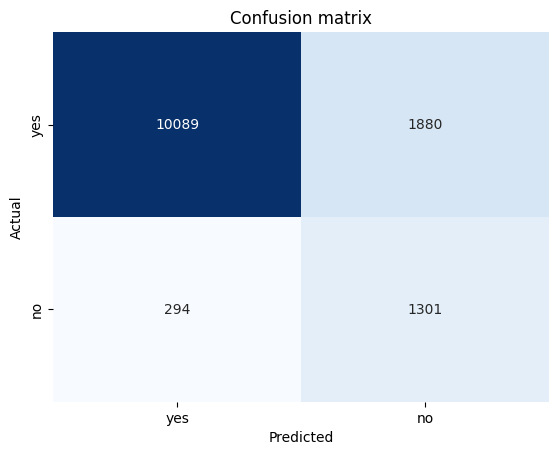

In [34]:
cm=confusion_matrix(y_test,pred)
labels=['yes','no']
plt.title('Confusion matrix')
sns.heatmap(cm,cbar=False,xticklabels=labels,yticklabels=labels,fmt='d',annot=True,cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
cm

array([[10089,  1880],
       [  294,  1301]])

In [41]:
#Calculating classification metrics
tp,fn,fp,tn=cm.ravel()
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
accuracy=(tp+tn)/(tp+tn+fp+fn)*100
F1score=(2*precision*recall/(precision+recall))

print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",F1score)
print("Accuracy:",accuracy)

Precision: 97.1684484253106
Recall: 84.29275628707494
F1 score: 90.27380100214745
Accuracy: 83.97227956355057


In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     11969
           1       0.41      0.82      0.54      1595

    accuracy                           0.84     13564
   macro avg       0.69      0.83      0.72     13564
weighted avg       0.91      0.84      0.86     13564

